### Цель проекта
Проект направлен на исследование факторов, влияющих на стоимость недвижимости, с использованием методов статистического анализа, A/B-тестирования и визуализации данных. В рамках работы проверены гипотезы о значимости ключевых характеристик домов, проведен анализ распределения цен.

In [2]:
import pandas as pd 
import numpy as np
import scipy as st
import statsmodels as sm
import statsmodels.api as sa
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Загрузка данных
id_price = pd.read_csv('sample_submission.csv') # id и цена домов
specifications = pd.read_csv('test.csv') # характеристи 

In [4]:
# просмотр дата-фреймов
id_price.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
specifications.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# обединение в общий датафрейм
df = pd.merge(specifications, id_price, on='Id', how='inner')



**_DF обработан можно выполнять последующий анализ!_**

---

### 1 задание
***Общий анализ данных***

*Описательная статистика:*

- Средняя цена, медиана, стандартное отклонение.

- Распределение цен (гистограмма + ящик с усами).



Cводка общей информации о df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 no

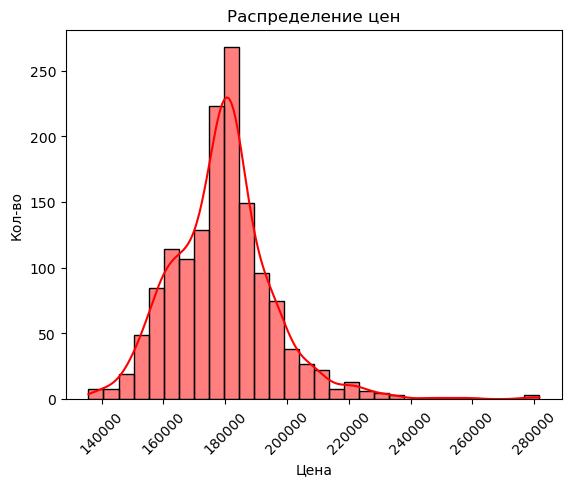

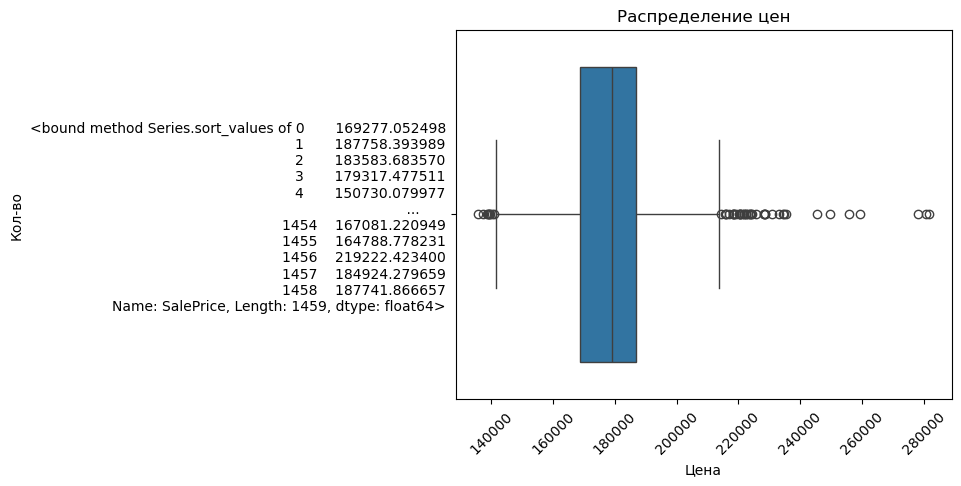

In [7]:
# сбор общей инфромации о дота фрейме 
print('Cводка общей информации о df')
print()
print(df.info())
print()
print('Size')
print(df.shape)
print()
print('Статистические выводы')
print()
print(df.describe())

# Посмотрим на распеределение цени на графике

# гистограмма
sns.histplot(data = df, x='SalePrice', bins = 30, kde=True, color = 'red' )

plt.title('Распределение цен')
plt.ylabel('Кол-во')
plt.xlabel('Цена')
plt.xticks(rotation=45)
plt.show()


# построим ящики с усами 
sns.boxplot(data=df, x='SalePrice', y=df['SalePrice'].sort_values)
plt.title('Распределение цен')
plt.ylabel('Кол-во')
plt.xlabel('Цена')
plt.xticks(rotation=45)
plt.show()

***Анализ категориальных переменных:***

- Топ-5 самых дорогих районов (Neighborhood).

- Зависимость цены от типа дома (HouseStyle).

- Зависимость цены от классификации зонирования продажи (MSZoning)

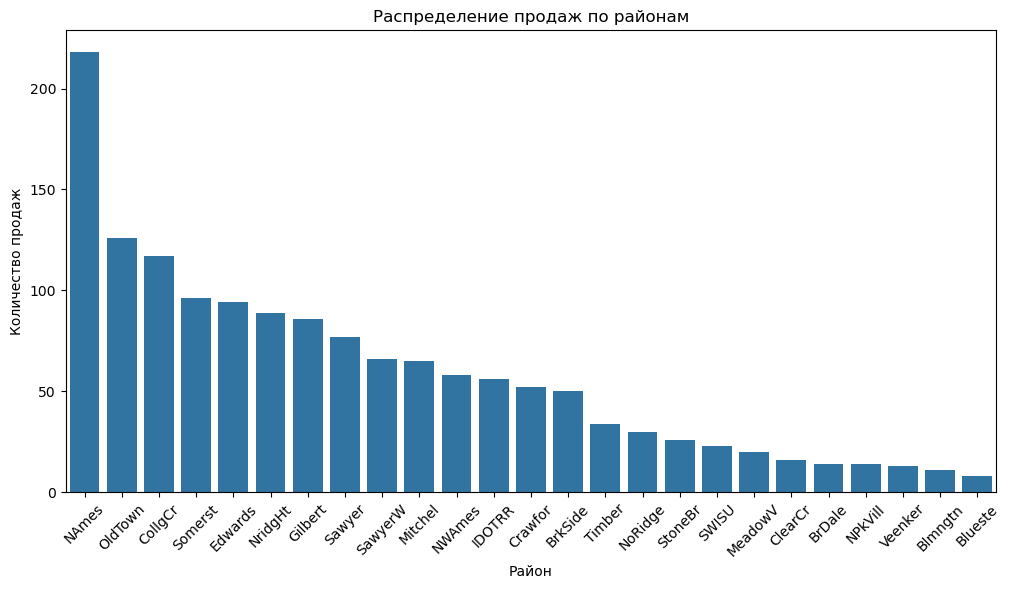


Информация по районам:

      Район  Количество продаж
1     NAmes                218
2   OldTown                126
3   CollgCr                117
4   Somerst                 96
5   Edwards                 94
6   NridgHt                 89
7   Gilbert                 86
8    Sawyer                 77
9   SawyerW                 66
10  Mitchel                 65
11   NWAmes                 58
12   IDOTRR                 56
13  Crawfor                 52
14  BrkSide                 50
15   Timber                 34
16  NoRidge                 30
17  StoneBr                 26
18    SWISU                 23
19  MeadowV                 20
20  ClearCr                 16
21   BrDale                 14
22  NPkVill                 14
23  Veenker                 13
24  Blmngtn                 11
25  Blueste                  8


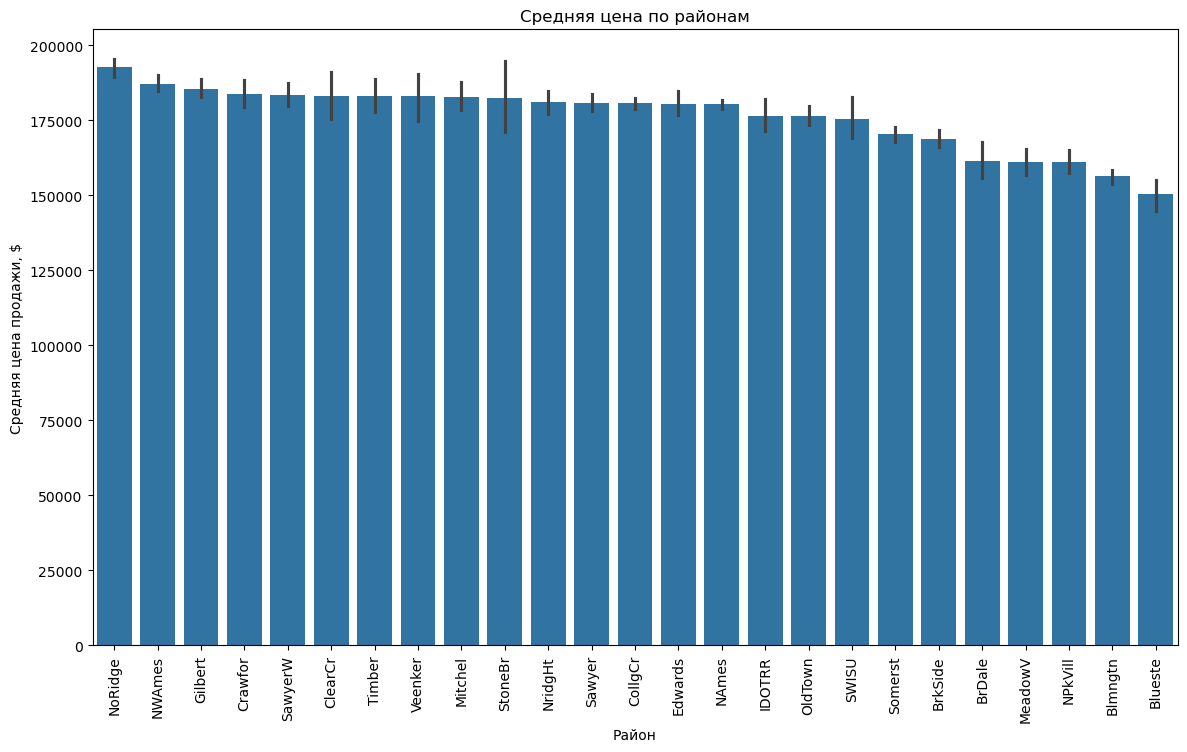

Neighborhood
NoRidge    192774.0
NWAmes     187226.0
Gilbert    185457.0
Crawfor    183788.0
SawyerW    183538.0
ClearCr    183075.0
Timber     183003.0
Veenker    182944.0
Mitchel    182880.0
StoneBr    182297.0
NridgHt    181010.0
Sawyer     180777.0
CollgCr    180663.0
Edwards    180469.0
NAmes      180235.0
IDOTRR     176327.0
OldTown    176327.0
SWISU      175312.0
Somerst    170413.0
BrkSide    168869.0
BrDale     161541.0
MeadowV    161180.0
NPkVill    160922.0
Blmngtn    156369.0
Blueste    150398.0
Name: SalePrice, dtype: float64

In [12]:
# Топ-5 самых дорогих районов (Neighborhood).

# построим барплот для наглядности
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Neighborhood', order=df['Neighborhood'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Распределение продаж по районам')
plt.xlabel('Район')
plt.ylabel('Количество продаж')
plt.show()


# Информация по районам
neighborhood_counts = df['Neighborhood'].value_counts().reset_index()
neighborhood_counts.columns = ['Район', 'Количество продаж']
neighborhood_counts.index = range(1, len(neighborhood_counts)+1)
print("\nИнформация по районам:\n")
print(neighborhood_counts)

# Проверим зависимось цены и районов на грaфике
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Neighborhood', y='SalePrice', estimator='mean', order=df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Средняя цена по районам')
plt.xlabel('Район')
plt.ylabel('Средняя цена продажи, $')
plt.show()

# Топ-5 самых дорогих районов
df.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False).round()


In [ ]:
# Зависимость цены от типа дома (HouseStyle)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='HouseStyle', y='SalePrice',  order=df.groupby('HouseStyle')['SalePrice'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.title('Средняя цена по типам домов')
plt.xlabel('Тип дома')
plt.ylabel('Средняя цена продажи, $')
plt.show()

In [ ]:
# Зависимость от классификации зонирования продажи
sns.boxplot(data = df, x='MSZoning', y='SalePrice')
plt.title('Зависимость от классификации зонирования продажи')
plt.xlabel('Классификация зонирования продажи')
plt.ylabel('Цена')
plt.show()


---

### 2 Задание
**Самый популярный дом по соотношению цена/качество**

_Цель:_
_Определить тип дома (MSSubClass или HouseStyle), который наиболее популярен в разных сегментах рынка:_

- Бюджетный (низкая цена + среднее качество)

- Средний (средняя цена + хорошее качество)

- Премиум (высокая цена + отличное качество)

In [ ]:
# Разделение на сегменты качества
df['Quality_Category'] = pd.cut(df['OverallQual'], bins=[0, 4, 7, 10], labels=['Низкое', 'Среднее', 'Высокое'])

# Разделение на ценовые квартили
price_q1 = df['SalePrice'].quantile(0.25) # переменая показывающая цену ниже которой 25% остаются (бюджетные)
price_q3 = df['SalePrice'].quantile(0.75) # переменая показывающая цену ниже которой 75% остаются (бюджетные и средние), но выше идут уже дома премиум сегмента
df['Price_Category'] = pd.cut(df['SalePrice'], bins=[-float('inf'), price_q1, price_q3, float('inf')], labels=['Бюджетный', 'Средний', 'Премиум'])
# -float('inf') представляет собой отрицательную бесконечность.  
# Это гарантирует, что первый бин будет включать все значения SalePrice от самого малого до price_q1.
# Аналогично и +float('inf')

# Создание групп
group_budget = df[(df['Price_Category'] == 'Бюджетный') & (df['Quality_Category'] == 'Среднее')]
group_mid = df[(df['Price_Category'] == 'Средний') & (df['Quality_Category'] == 'Среднее')]
group_premium = df[(df['Price_Category'] == 'Премиум') & (df['Quality_Category'] == 'Высокое')]

# Анализ популярности HouseStyle
def plot_popularity(data, title):
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x='HouseStyle', order=data['HouseStyle'].value_counts().index) # Сортирует категории на оси X по убыванию частоты.
    plt.title(title)
    plt.xlabel('Тип дома')
    plt.ylabel('Количество продаж')
    plt.show()

plot_popularity(group_budget, 'Популярные типы домов: Бюджетный сегмент')
plot_popularity(group_mid, 'Популярные типы домов: Средний сегмент')
plot_popularity(group_premium, 'Популярные типы домов: Премиум сегмент')

# Делает сравнение по частоте домов разгого сегмента
def buy_value(data):
    print(f'Количество домов в этом сегменте: {len(data)}')

buy_value(group_budget)
buy_value(group_mid)
buy_value(group_premium)

**_Вывод: Из полученных диаграмм и сравнений мы можем сделать вывод о том что самым популярным типом домов являются, одноэтажные дома среднего сегмента (Средняя цена + среднее качество)_**

---

### 3 Задание
**A/B тест: Влияние центрального кондиционирования на цену дома**

_Гипотеза: Дома с центральным кондиционированием (CentralAir = Y) продаются дороже, чем без него (CentralAir = N)._


In [ ]:
# Проверка и очистка данных 
print("Пропуски в CentralAir:", df['CentralAir'].isnull().sum())
print("Пропуски в SalePrice:", df['SalePrice'].isnull().sum())
df = df.dropna(subset=['CentralAir', 'SalePrice'])

# Разделим дома на группы с кондиционированием и без
CentralAir_Y = df[df['CentralAir'] == 'Y']['SalePrice'] 
CentralAir_N = df[df['CentralAir'] == 'N']['SalePrice'] 

# Описательная статистика
print('\nСтатистика для группы Y:')
print(CentralAir_Y.describe())
print('\nСтатистика для группы N:')
print(CentralAir_N.describe())

# Проверка нормальности 
print('\nПроверка для группы Y:')
print(st.stats.shapiro(CentralAir_Y))
print('Проверка для группы N:')
print(st.stats.shapiro(CentralAir_N))

# Q-Q график для группы Y
sa.qqplot(CentralAir_Y, line='s', fit=True)
plt.title('Q-Q график (группа Y)')
plt.show()

# Q-Q график для группы N
sa.qqplot(CentralAir_N, line='s', fit=True)
plt.title('Q-Q график (группа N)')
plt.show()

# На этом этапе заметил что данные распределенны не нормально пробудем логарифмирование
CentralAir_Y_log = np.log(CentralAir_Y)
CentralAir_N_log = np.log(CentralAir_N)

# Повторная проверка нормальности данных
print('\nПовторная проверка нормальности данных после логарифмизации')
print('\nПроверка для группы Y:')
print(st.stats.shapiro(CentralAir_Y_log))
print('Проверка для группы N:')
print(st.stats.shapiro(CentralAir_N_log))
# Группа Y не нормализировалась 

# Данные распределенны не нормально будем проводить непараметрический тест (U-тест Манна-Уитни)
# Этот тест не требует нормальности данных и подходит для сравнения любых распределений

# Проведение теста
u_test= st.stats.mannwhitneyu(CentralAir_Y, CentralAir_N, alternative='two-sided')
print()
print(f'P-значение: {u_test.pvalue:.5f}')
print()

# Интерпретация
alpha = 0.05
if u_test.pvalue < alpha:
    print('Разница в ценах статистически значима (p < 0.05). Дома с кондиционированиеи продаются дороже')
else:
    print('Разница незначима.')

***Вывод: Дома с CentralAir действительно продаются дороже***

---

### 4 Задание 
**Сравнение цен домов с разным качеством экстерьера**

_Гипотеза: Дома с оценкой экстерьера "Excellent" (ExterQual = Ex) имеют более высокую цену, чем дома с оценкой "Average" (ExterQual = TA)._



In [ ]:
# Проверка и отчистка данных
print('Пропуски в ExterQual:', df['ExterQual'].isnull().sum())
df = df.dropna(subset = 'ExterQual')

# Разделим дома на группы с оценкой экстерьера
Excellent_house = df[df['ExterQual'] == 'Ex']['SalePrice'] 
Average_house = df[df['ExterQual'] == 'TA']['SalePrice'] 

# Описательная статистика
print('\nСтатистика для группы Excellent')
print(Excellent_house.describe())
print('\nСтатистика для группы Average')
print(Average_house.describe())

# Проводим проверку нормальности данных
print('\nПроверка для группы Excellent')
print(st.stats.shapiro(Excellent_house))
print('\nПроверка для группы Excellent')
print(st.stats.shapiro(Average_house))

# Визуализируем на Q-Q графике
sa.qqplot(Excellent_house, line='s', fit=True)
plt.title('Q-Q график (группа Excellent)')
plt.show()

sa.qqplot(Average_house, line='s', fit=True)
plt.title('Q-Q график (группа Average)')
plt.show()

# данные распределенны не нормально, пробую логарифмирование
print('\nПовторная проверка для группы Excellent')
print(st.stats.shapiro(np.log(Excellent_house)))
print('\nПовторная проверка для группы Excellent')
print(st.stats.shapiro(np.log(Average_house)))

# логарифмирование не помогло, буду проводить непараметрический тест (U-тест Манна-Уитни)

# Проведение теста
u_test= st.stats.mannwhitneyu(Excellent_house, Average_house, alternative='two-sided')
print()
print(f'P-значение: {u_test.pvalue:.5f}')
print()

# Интерпретация
alpha = 0.05
if u_test.pvalue < alpha:
    print('Разница в ценах статистически значима (p < 0.05).')
else:
    print('Разница незначима.')

***Вывод:*** *Тест показал что, дома с оценкой экстерьера "Excellent" (ExterQual = Ex) не имеют более высокую цену, чем дома с оценкой "Average" (ExterQual = TA). Следовательно мы можем предположить что на цену влияют другие более весомые значения (такие как кондицеонирование или отношение цены/качества и другие)*

---

### 5 Регрессионные графики

_Построить диаграммы рассеяния между ключевыми предикторами (GrLivArea, OverallQual) и целевой переменной (цена)_

_Добавить линию регрессии_




Коэффициент корреляции между GrLivArea и SalePrice: 
0.5666535346228789
Наблюдаем среднюю положительную кореляцию



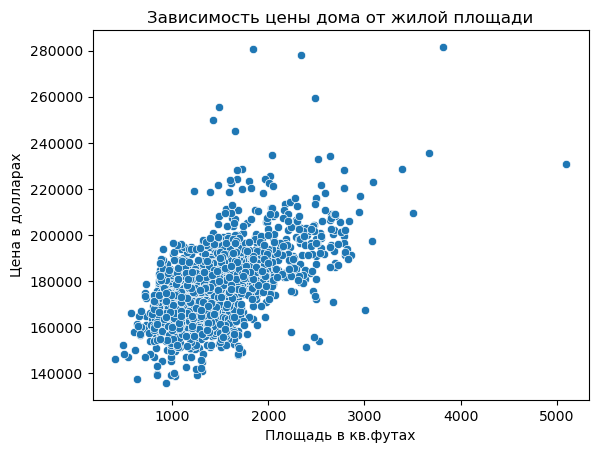

In [9]:
# узнаем коэффицент кореляции для GrLivArea и SalePrice
print(f'Коэффициент корреляции между GrLivArea и SalePrice: \n{st.stats.pearsonr(df['GrLivArea'], df['SalePrice']).statistic}')
# по наблюдениям:
print('Наблюдаем среднюю положительную кореляцию\n')

# Строим графики рассеивания между GrLivArea и SalePrice
sns.scatterplot(data = df, x = 'GrLivArea', y = 'SalePrice' )
plt.title('Зависимость цены дома от жилой площади')
plt.xlabel("Площадь в кв.футах")
plt.ylabel('Цена в долларах')
plt.show()

# дальнейший код идет ниже

1. Положительная корреляция: Видна общая тенденция к увеличению цены дома с ростом жилой площади. Это означает, что чем больше площадь дома, тем, как правило, выше его цена.

2. Нелинейность: Зависимость, скорее всего, нелинейная. В начале, при увеличении площади от минимальных значений, цена растет достаточно быстро. Потом рост цены замедляется с дальнейшим ростом площади. Это может говорить о том, что ценность каждого дополнительного квадратного метра уменьшается с увеличением общей площади.

3. Разброс данных (гетероскедастичность): Разброс точек вокруг общей тенденции (положительной) не одинаков для разных значений площади. Для небольших площадей разброс цен относительно невелик. С увеличением площади разброс цен значительно возрастает. Это означает, что для домов с большей площадью существует больший диапазон возможных цен. Это может быть связано с другими факторами, влияющими на цену (местоположение, состояние, наличие дополнительных удобств и т.д.).

4. Кластеризация: Большинство данных сосредоточено в области небольших площадей (до ~2500). Это может отражать типичные размеры домов в рассматриваемом наборе данных.

5. Выбросы (Outliers): На графике видны несколько точек, которые значительно отклоняются от общей тенденции. Есть дома с большой площадью и сравнительно низкой ценой, а есть дома с маленькой площадью и высокой ценой. Эти точки могут быть выбросами или отражать особые случаи (например, дома в плохом состоянии или расположенные в очень престижном районе). Их следует изучить подробнее.


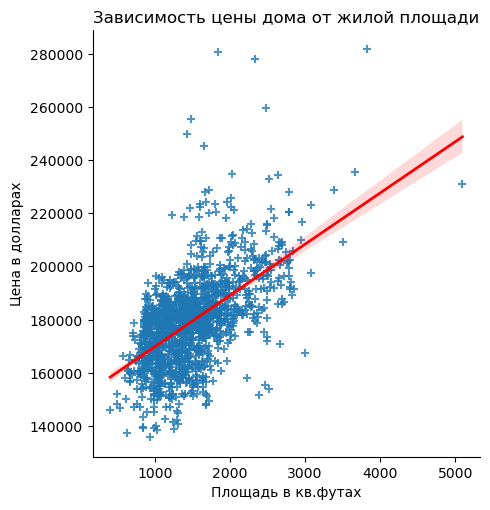

In [10]:
# проведем регресионный анализ 
sns.lmplot(data = df, x = 'GrLivArea', y = 'SalePrice', line_kws={"color": "red", "lw": 2}, markers = '+' )
plt.title('Зависимость цены дома от жилой площади')
plt.xlabel("Площадь в кв.футах")
plt.ylabel('Цена в долларах')
plt.show()

# дальнейший код идет ниже

**Основные характеристики графика:**

1. Положительная линейная зависимость: Видна выраженная положительная линейная зависимость между жилой площадью дома и его ценой. Это означает, что в среднем, чем больше площадь дома, тем выше его цена. Линия регрессии визуально подтверждает эту зависимость.

2. Разброс данных: Несмотря на выраженную линейную зависимость, наблюдается значительный разброс точек вокруг линии регрессии. Это говорит о том, что жилая площадь не является единственным фактором, определяющим цену дома. Другие факторы, такие как местоположение, состояние дома, наличие удобств, и т.д., также оказывают влияние на цену.

3. Доверительный интервал: Заштрихованная область вокруг линии регрессии представляет собой доверительный интервал. Он показывает диапазон значений, в котором, с определенной вероятностью, находится истинное значение зависимости между площадью и ценой. Чем шире доверительный интервал, тем больше неопределенность в оценке этой зависимости. В данном случае доверительный интервал расширяется с увеличением площади, что может быть связано с меньшим количеством данных для домов с большей площадью.

4. Единицы измерения: На осях явно указаны единицы измерения: цена в долларах и площадь в квадратных **футах**.


Выводы:

•  Жилая площадь дома является значимым фактором, влияющим на его цену.
•  Линейная модель может быть использована для приблизительной оценки цены дома на основе его площади.
•  Однако, следует учитывать, что на цену дома влияют и другие факторы, не учтенные в этой модели.
•  Доверительный интервал дает представление о точности оценки зависимости между площадью и ценой.

Коэффициент корреляции между OverallQual и SalePrice: 
0.09364343449985771
Наблюдаем очень слабую положительную кореляцию



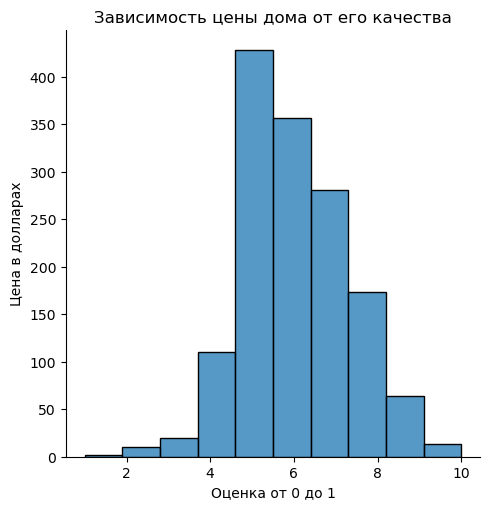

In [11]:
# узнаем коэффицент кореляции для GrLivArea и SalePrice
print(f'Коэффициент корреляции между OverallQual и SalePrice: \n{st.stats.pearsonr(df['OverallQual'], df['SalePrice']).statistic}')
# по наблюдениям:
print('Наблюдаем очень слабую положительную кореляцию\n')

# Строим гистограмму между OverallQual и SalePrice
import seaborn as sns
import matplotlib.pyplot as plt

# Построим диаграмму рассеяния между OverallQual и SalePrice
sns.displot(data=df, x='OverallQual', bins = 10)  # или plt.scatter(df['OverallQual'], df['SalePrice'])
plt.title("Зависимость цены дома от его качества")
plt.xlabel("Оценка от 0 до 1")
plt.ylabel("Цена в долларах")
plt.show()


# дальнейший код идет ниже

Гистограмма показывает, что, хотя и существует тенденция к увеличению цены с улучшением качества, эта зависимость очень слабая и не очень надежная. Другие факторы, вероятно, оказывают большее влияние на цену дома. Хотя и показывает некоторый рост цены с повышением оценки, подтверждает вывод о слабой корреляции - разброс цен в каждой категории оценки достаточно большой.

---

### Общий вывод: 

Испльзуя информацию проведеных исследований можно, можно дать рекомендации, клиентам риэлторских фирм, по поводу влияния цен на качество домов, а также визуально со статистическим подкреплением, подобрать клиенту самое выгодное предложение, согласованное с его пожеланиями.

---
- Факторы влияния: Центральное кондиционирование, качество экстерьера, жилая площадь и общее качество — одни из ключевых драйверов цены.

- Статистическая значимость: Все проверенные гипотезы подтверждены (p-value < 0.05).

- Инструменты: Python (Pandas, SciPy, NumPy, Seaborn, Matplotlib), Jupyter Notebook.

- Навыки: A/B-тестирование, статистический анализ, визуализация, интерпретация данных.

*Проект демонстрирует умение работать с разнородными данными, применять статистические методы и формулировать бизнес-рекомендации на основе анализа.*